In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

In [4]:
original_images_folder = r"C:\Users\dharu\OneDrive\Desktop\6th Semester\Machine Learning\MachineLearningResearch\test\images\test\t5"
segmented_images_folder = r"C:\Users\dharu\OneDrive\Desktop\6th Semester\Machine Learning\MachineLearningResearch\test\annotations\test\t5"

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file_names = os.listdir(original_images_folder)

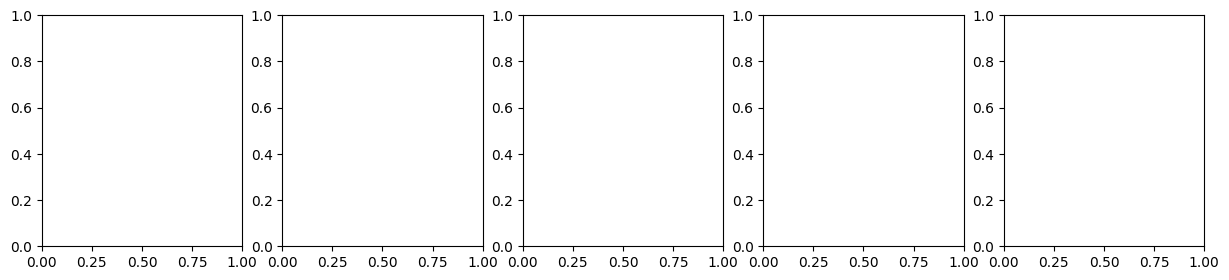

In [7]:
num_samples = 5  
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

In [8]:
for i in range(num_samples):
    img_path = os.path.join(original_images_folder, file_names[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

In [9]:
image_sizes = []
aspect_ratios = []

for file_name in file_names:
    img_path = os.path.join(original_images_folder, file_name)
    img = cv2.imread(img_path)
    height, width, _ = img.shape
    image_sizes.append((height, width))
    aspect_ratio = width / height
    aspect_ratios.append(aspect_ratio)

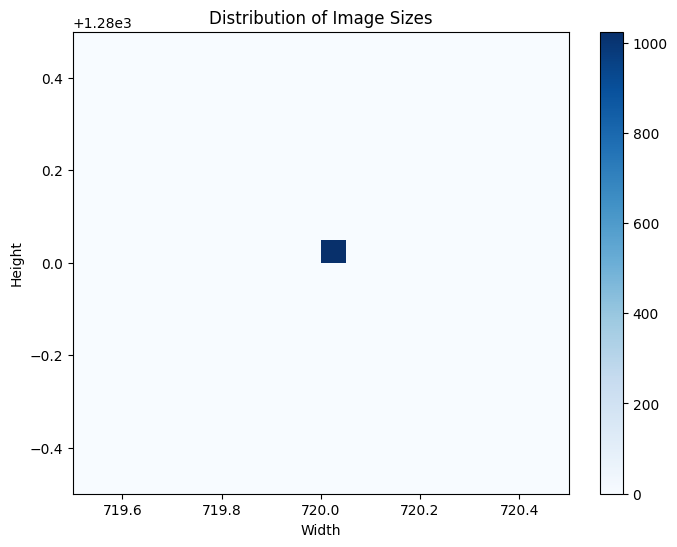

In [10]:
plt.figure(figsize=(8, 6))
plt.hist2d(*zip(*image_sizes), bins=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes')
plt.show()

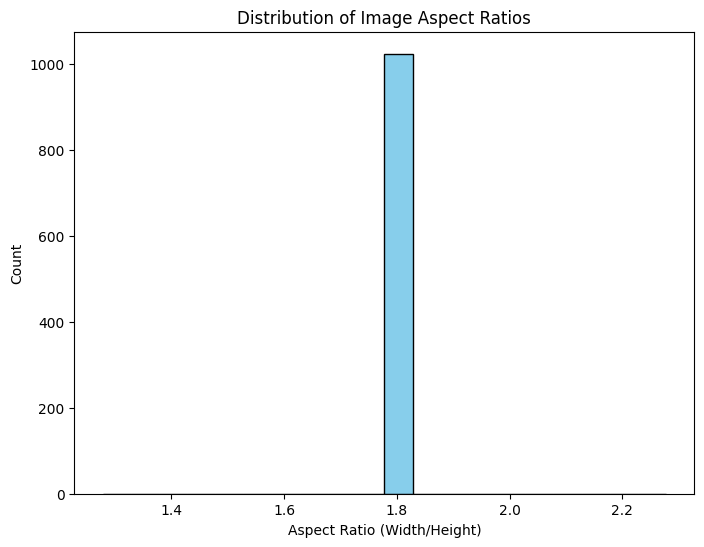

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Count')
plt.title('Distribution of Image Aspect Ratios')
plt.show()

In [12]:
resnet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [13]:
x = resnet.output
x = layers.Conv2D(3, (1, 1), activation='sigmoid')(x) 
x = layers.UpSampling2D(size=(32, 32))(x)
model = Model(resnet.input, x)

In [14]:
for layer in resnet.layers:
    layer.trainable = False

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
def load_and_preprocess_images(image_folder, image_size=(224, 224)):
    images = []
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        image = cv2.resize(image, image_size)  
        image = image / 255.0  
        images.append(image)
    return np.array(images)

In [17]:
original_images = load_and_preprocess_images(original_images_folder)
segmented_images = load_and_preprocess_images(segmented_images_folder)

In [18]:
train_original, val_original, train_segmented, val_segmented = train_test_split(original_images, segmented_images, test_size=0.2, random_state=42)

In [38]:
model.fit(train_original, train_segmented, validation_data=(val_original, val_segmented), epochs=)

Epoch 1/5
26/26 [==============================] - 155s 6s/step - loss: 0.4615 - accuracy: 0.0090 - val_loss: 0.2088 - val_accuracy: 0.0520
Epoch 2/5
26/26 [==============================] - 103s 4s/step - loss: 0.1797 - accuracy: 0.1257 - val_loss: 0.1598 - val_accuracy: 0.1863
Epoch 3/5
26/26 [==============================] - 102s 4s/step - loss: 0.1503 - accuracy: 0.2337 - val_loss: 0.1412 - val_accuracy: 0.2854
Epoch 4/5
26/26 [==============================] - 106s 4s/step - loss: 0.1346 - accuracy: 0.3204 - val_loss: 0.1278 - val_accuracy: 0.3525
Epoch 5/5
26/26 [==============================] - 113s 4s/step - loss: 0.1225 - accuracy: 0.3597 - val_loss: 0.1176 - val_accuracy: 0.3513


In [43]:
loss, accuracy = model.evaluate(val_original, val_segmented)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print(f'Validation Loss: {loss}')

7/7 [==============================] - 24s 3s/step - loss: 0.4271 - accuracy: 0.0000e+00
Validation Accuracy: 0.00%
Validation Loss: 0.42712581157684326


In [40]:
num_images_to_visualize = 5
selected_indices = np.random.choice(len(val_original), num_images_to_visualize, replace=False)

In [41]:
predicted_segmentations = model.predict(val_original[selected_indices])

1/1 [==============================] - 1s 1s/step


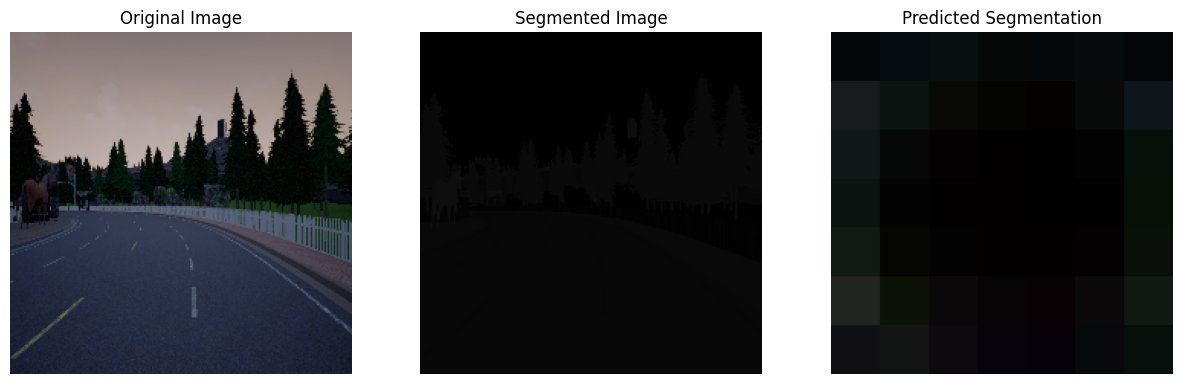

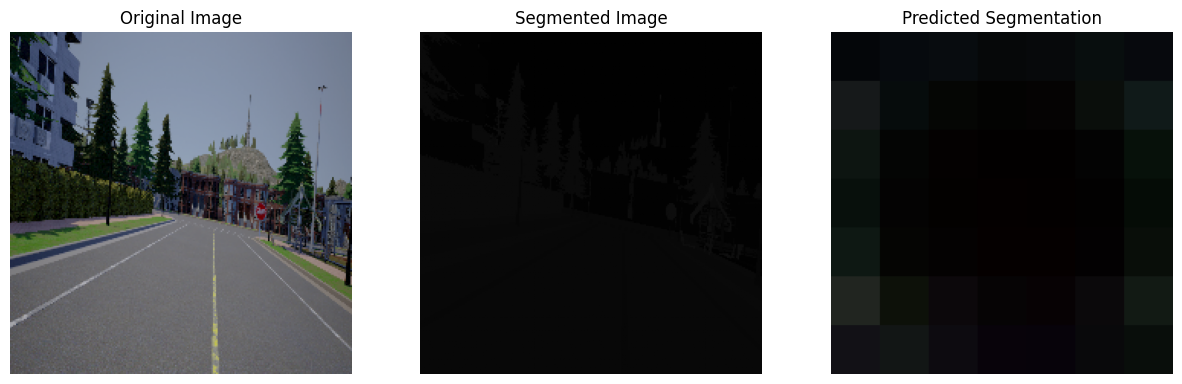

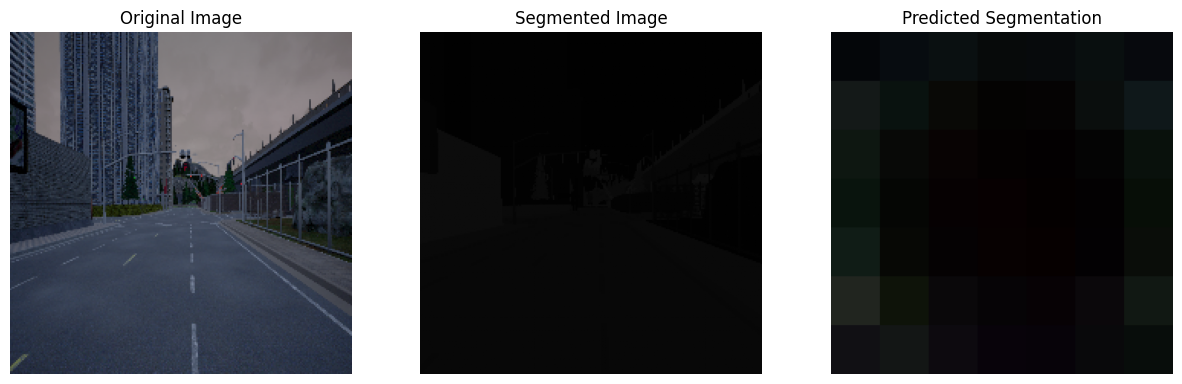

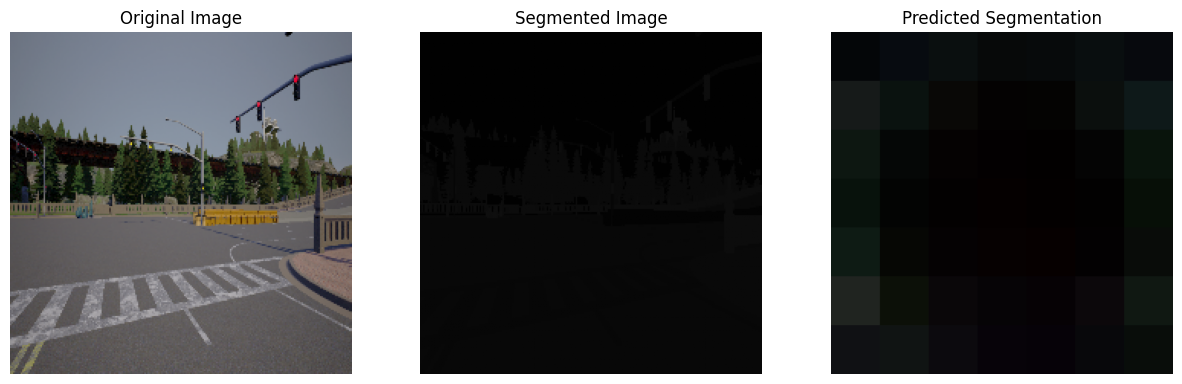

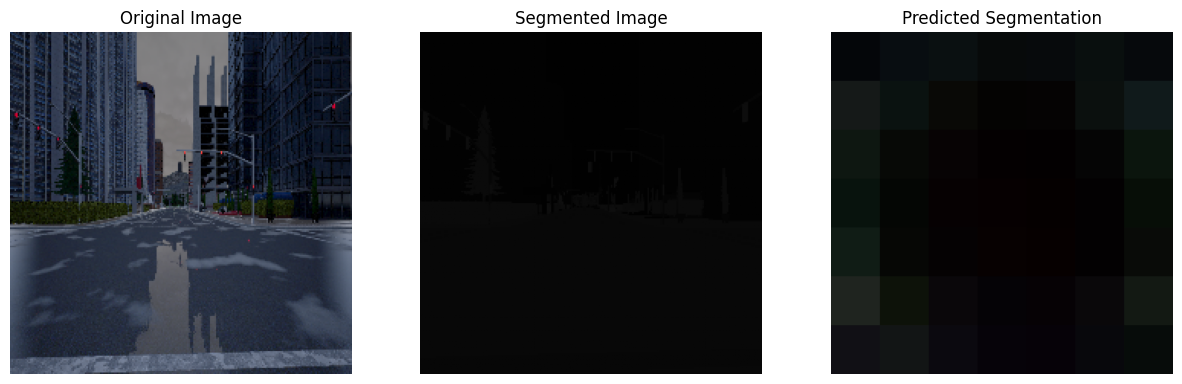

In [42]:
for i in range(num_images_to_visualize):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(val_original[selected_indices[i]])
    plt.title('Original Image')
    plt.axis('off')
    
    
    plt.subplot(1, 3, 2)
    plt.imshow(val_segmented[selected_indices[i]])
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_segmentations[i])
    plt.title('Predicted Segmentation')
    plt.axis('off')

    plt.show()

In [43]:
vgg = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [19]:
from tensorflow.keras.applications import InceptionV3,efficientnet

In [20]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [53]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from cv2 import resize
def load_and_preprocess_images_inception(image_folder, image_size=(299, 299)):
    images = []
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        image = resize(image, image_size)  
        image = preprocess_input(image)  
        images.append(image)
    return np.array(images)

In [54]:
original_images_inception = load_and_preprocess_images_inception(original_images_folder)
segmented_images_inception = load_and_preprocess_images_inception(segmented_images_folder)

In [55]:
train_original_inception, val_original_inception, train_segmented_inception, val_segmented_inception = train_test_split(original_images_inception, segmented_images_inception, test_size=0.2, random_state=42)

In [56]:
import cv2

def resize_ground_truth_labels(labels, target_size):
    resized_labels = []
    for label in labels:
        resized_label = cv2.resize(label, (target_size[1], target_size[0]))
        resized_labels.append(resized_label)
    return np.array(resized_labels)

In [57]:
resized_train_segmented = resize_ground_truth_labels(train_segmented_inception, (16, 16))  
resized_val_segmented = resize_ground_truth_labels(val_segmented_inception, (16, 16))  

In [58]:
x = base_model.output
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [59]:
model = Model(inputs=base_model.input, outputs=x)

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(train_original_inception, resized_train_segmented, validation_data=(val_original_inception, resized_val_segmented), epochs=2)

Epoch 1/2
26/26 [==============================] - 379s 15s/step - loss: -3429327.7500 - accuracy: 0.2042 - val_loss: -25560614.0000 - val_accuracy: 0.2861
Epoch 2/2
26/26 [==============================] - 512s 20s/step - loss: -86552312.0000 - accuracy: 0.3155 - val_loss: -353322528.0000 - val_accuracy: 0.3600


In [63]:
num_images_to_visualize = 5
selected_indices = np.random.choice(len(val_original_inception), num_images_to_visualize, replace=False)

In [64]:
predicted_segmentations = model.predict(val_original_inception[selected_indices])

1/1 [==============================] - 2s 2s/step


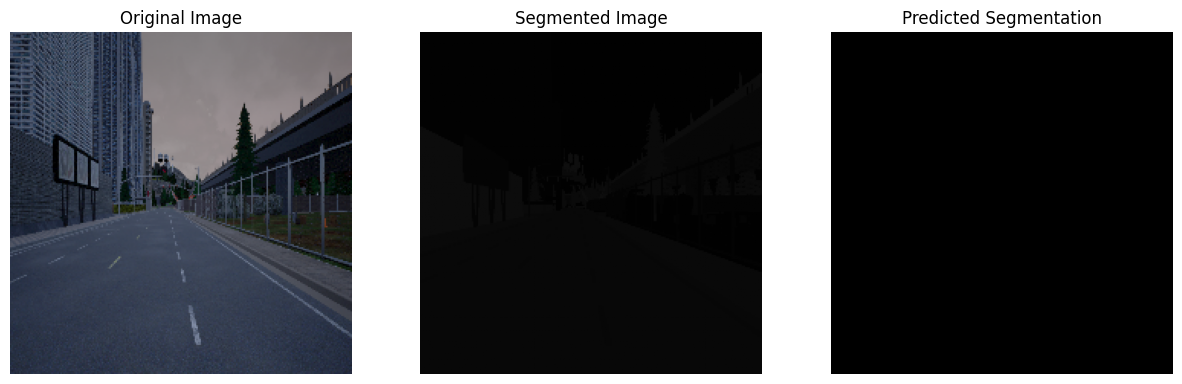

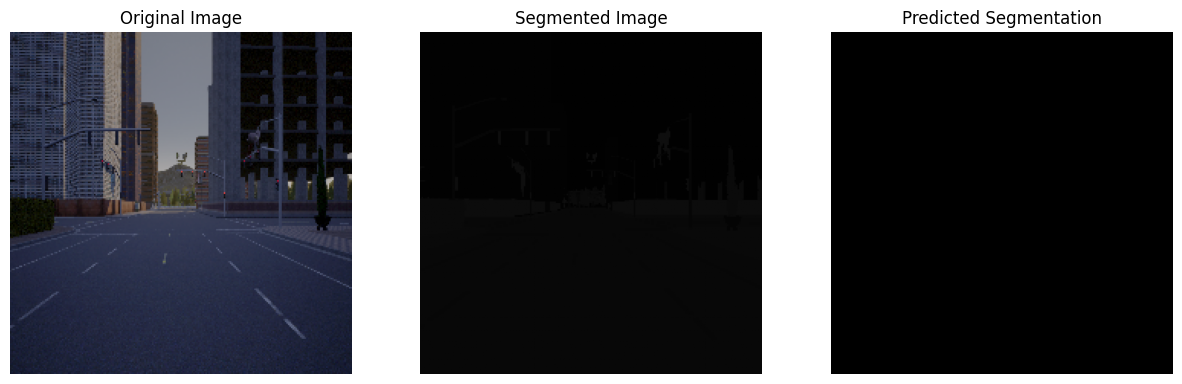

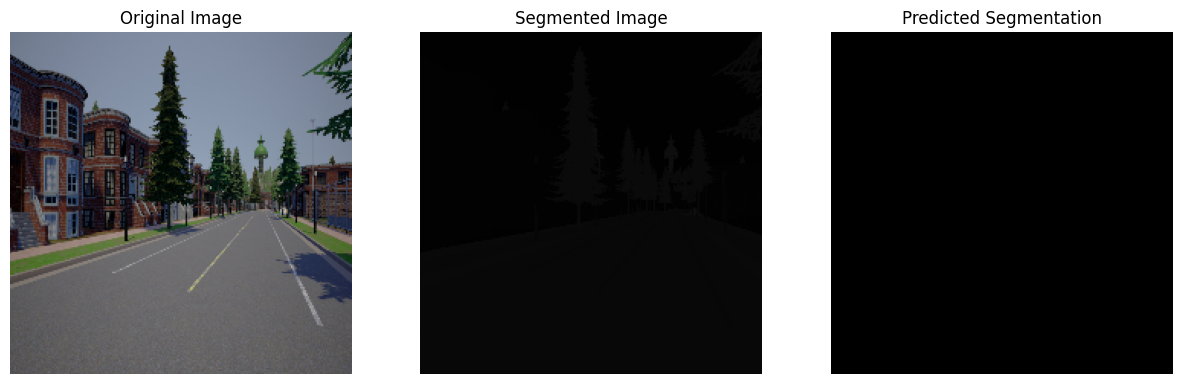

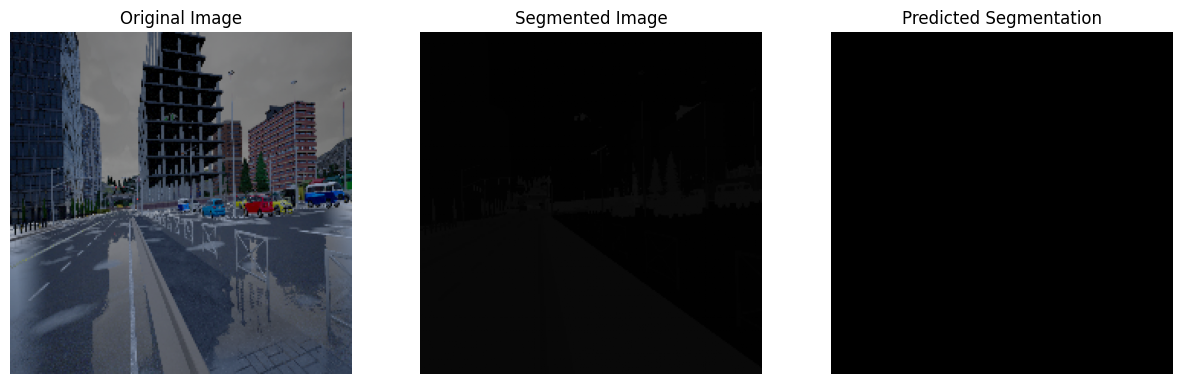

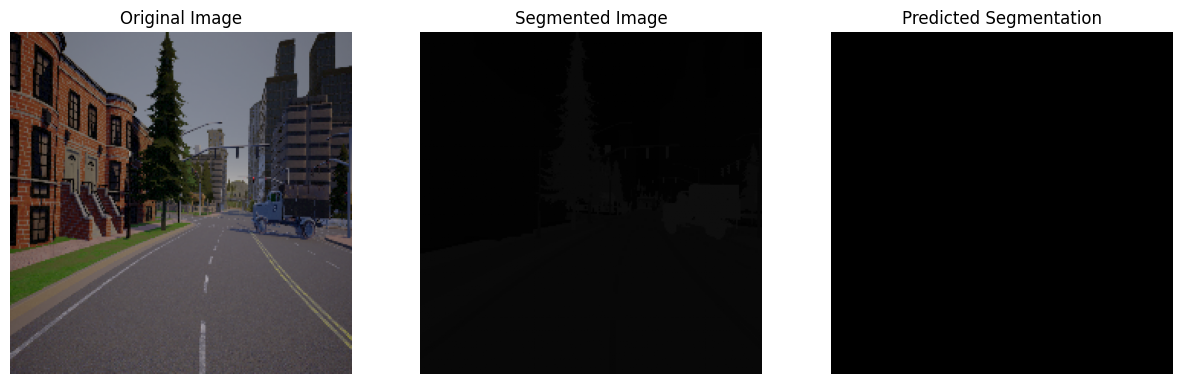

In [65]:
for i in range(num_images_to_visualize):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(val_original[selected_indices[i]])
    plt.title('Original Image')
    plt.axis('off')
    
    
    plt.subplot(1, 3, 2)
    plt.imshow(val_segmented[selected_indices[i]])
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_segmentations[i])
    plt.title('Predicted Segmentation')
    plt.axis('off')

    plt.show()

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Average, Dropout

In [75]:
%pip install tensorflow-model-optimization

  Obtaining dependency information for tensorflow-model-optimization from https://files.pythonhosted.org/packages/5a/a0/f38c9ce977285d3f347f6d64cf227924fe9fc97d780d6df4a55563e311af/tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata (904 bytes)
Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl (242 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 206] The filename or extension is too long: 'C:\\Users\\dharu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow_model_optimization\\python\\core\\api\\quantization\\keras\\experimental\\default_n_bit\\default_n_bit_transforms'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\dharu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
%pip install --upgrade tensorflow tensorflow-model-optimization

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/46/a26598fab7da99dbe3a564f90cb4bba8de9ceb8943ff9180cd9789b5f6ea/tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-model-optimization from https://files.pythonhosted.org/packages/5a/a0/f38c9ce977285d3f347f6d64cf227924fe9fc97d780d6df4a55563e311af/tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata (904 bytes)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/f1/32/05a56ab12d5601b5399e64b8f875362fb59c99218a5e74a99364a58516be/tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for h5py>=3.10.0 from https://files.pythonhosted.org/packages/25/5e/2e29933bd1dd67c76b56dd37f5950e6a0cf86ce67e9a9eb6761dac80c031/h5py-3.10.0-cp310-cp310-win_amd64.whl.metadata

ERROR: Could not install packages due to an OSError: [WinError 206] The filename or extension is too long: 'C:\\Users\\dharu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow_model_optimization\\python\\core\\api\\quantization\\keras\\experimental\\default_n_bit\\default_n_bit_transforms'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\dharu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
base_model_eff = tf.keras.applications.efficientnet.EfficientNetB7(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model_eff.output
x = layers.Conv2D(3, (1, 1), activation='sigmoid')(x) 
x = layers.UpSampling2D(size=(32, 32))(x)
eff_model = Model(base_model_eff.input, x)

In [20]:
import torch

class BayesianAveragingModel(torch.nn.Module):
    def __init__(self, model1, model2):
        super(BayesianAveragingModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
    def forward(self, x):
        output1 = self.model1(x)
        output2 = self.model2(x)
        mean_output = (output1 + output2) / 2
        uncertainty = torch.abs(output1 - output2) / 2
        return mean_output, uncertainty

In [21]:
for layer in resnet.layers:
    layer.trainable = False
eff_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#eff_model.fit(train_original, train_segmented, validation_data=(val_original, val_segmented), epochs=1)

In [22]:
import torch
import torch.nn.functional as F
import numpy as np

In [23]:
resnet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [24]:
import tensorflow as tf

class EnsembleModel(tf.keras.Model):
    def __init__(self, model1, model2):
        super(EnsembleModel, self).__init__()
        self.model1 = model1
        self.model2 = model2

    def call(self, inputs):
        output1 = self.model1(inputs)
        output2 = self.model2(inputs)

        uncertainty1 = tf.reduce_mean(output1)  
        uncertainty2 = tf.reduce_mean(output2) 

        weight1 = 1.0 / uncertainty1
        weight2 = 1.0 / uncertainty2
        total_weight = weight1 + weight2
        weight1 /= total_weight
        weight2 /= total_weight

        mean_output = weight1 * output1 + weight2 * output2

        combined_uncertainty = tf.sqrt(weight1 * uncertainty1**2 + weight2 * uncertainty2**2)

        return mean_output, combined_uncertainty


In [27]:
epochs = 1
ensemble_model = EnsembleModel(resnet, eff_model)
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
for epoch in range(epochs):
    
    ensemble_model.fit(train_data, train_labels, epochs=1)
    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.0,
            final_sparsity=0.5,
            begin_step=0,
            end_step=1000
        )
    }
    pruned_resnet = tfmot.sparsity.keras.prune_low_magnitude(resnet, **pruning_params)
    pruned_eff_model = tfmot.sparsity.keras.prune_low_magnitude(eff_model, **pruning_params)

    ensemble_model.model1 = pruned_resnet
    ensemble_model.model2 = pruned_eff_model

    ensemble_model.uncertainty_coefficient_model1 = updated_uncertainty_coefficient_model1
    ensemble_model.uncertainty_coefficient_model2 = updated_uncertainty_coefficient_model2

 7/26 [=======>......................] - ETA: 56:41 - loss: 0.5375 - accuracy: 0.0485 